# Credit card fraud detection project

In this project, we will be using data collected from credit card transactions to make predictions. This data
consists of records of customers which include data such as the distance from which the trasaction was made, order number and data about whether the transaction was either a fraud or legitimate.
We will use such records to make predictions that will detect if future credit card transactions is fraud.

In [1]:
# Import neccessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data Preprocessing

In [2]:
# Load dataset to dataframe.

df = pd.read_csv("card_transdata.csv")

In [3]:
# Shape of data.
df.shape

(1000000, 8)

In [4]:
# Dataset information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
# First five rows.

df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [6]:
# Descriptive statistic of data.
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Percentage of data.

df["fraud"].value_counts(normalize=True)

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

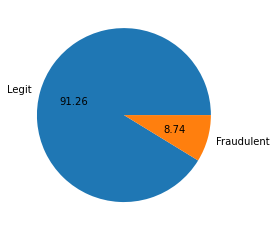

In [8]:
# Pie chart showing the percentages of legit and fraudulent data.

label = ["Legit", "Fraudulent"]
plt.pie(
    x=df["fraud"].value_counts(),
    autopct="%.2f",
    labels=label
);

### Observation
We can see from the above data that the dataset is heavily imbalanced. 91 percent of the data are legitimate while only 8.7 percent are fraudulent. Next, we will balance the dataset.

In [9]:
# legitimate and fraud dataframe.

legit = df[df["fraud"] == 0]
fraud = df[df["fraud"] == 1]

In [10]:
# Rows and columns of legitimate and fraud data.

legit.shape, fraud.shape

((912597, 8), (87403, 8))

In [11]:
# Balance the legit data with the number of records in the fraud data.

legit_sample = legit.sample(fraud.shape[0])

In [12]:
# Join the balanced data.

df_new = pd.concat([fraud, legit_sample], axis=0)

<AxesSubplot:ylabel='fraud'>

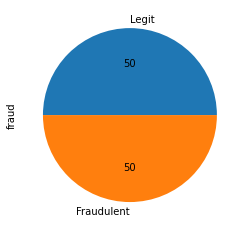

In [13]:
# Pie chart showing the balanced data.
df_new["fraud"].value_counts(normalize=True).plot(kind="pie", autopct="%1.0f", labels=label)

### Observation
From the above chart, we can see that the new dataset is now balanced.


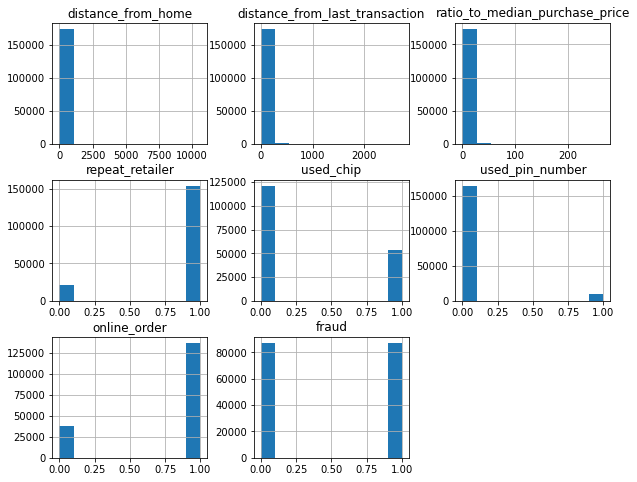

In [14]:
# Histogram showing the distribution of numerical data.

df_new.hist(figsize=(10,8));

## Split
In this section, we will be splitting the data into feature matrix and target vector.
They will later be split into training and test data.

In [15]:
# Feature matrix and target vector.

features = df.drop(columns="fraud").columns
target = "fraud"
X = df_new[features]
y = df_new[target]
X.shape, y.shape

((174806, 7), (174806,))

In [16]:
# Split data into training and test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model
In this section, we will be building a machine learning model to predict legitimacy of financial transactions.

In [17]:
# Instantiate logistic regression class.

model = LogisticRegression(max_iter=200)

In [18]:
# Build Model with training data.

model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Predict
In this section, we will be predicting whether a finacial transaction is either fraud or legitimacy. First with the training data and then, the test data.

In [19]:
# Predictions from training data
y_pred_train = model.predict(X_train)
y_pred_train[:5]

array([0., 1., 0., 1., 1.])

In [20]:
# Predictions from training data
y_pred_test = model.predict(X_test)
y_pred_test[:5]

array([1., 1., 0., 0., 0.])

## Evaluate
In this section, we will evalute the accuracy of our predictons on both the training and test data.

In [21]:
# Prediction accuracy on training data.

accuracy_score(y_train, y_pred_train)

0.9416135121993078

In [22]:
# Prediction accuracy on test data.

accuracy_score(y_test, y_pred_test)

0.9421657799897031

## Communicate

In [23]:
# Probabilities of the traning data predictions.

model.predict_proba(X_train)[:5]

array([[8.73131422e-01, 1.26868578e-01],
       [4.64876430e-01, 5.35123570e-01],
       [9.93958004e-01, 6.04199575e-03],
       [3.51564750e-04, 9.99648435e-01],
       [2.63789587e-01, 7.36210413e-01]])

In [24]:
# Probabilities of the tes data predictions.

model.predict_proba(X_test)[:5]

array([[1.31440983e-04, 9.99868559e-01],
       [1.58611788e-05, 9.99984139e-01],
       [9.99908239e-01, 9.17613539e-05],
       [9.89260947e-01, 1.07390533e-02],
       [8.85238581e-01, 1.14761419e-01]])

In [25]:
# Feature names and importantances of the model
feature_names = X_train.columns
importances = model.coef_[0]


In [26]:
# Series of importances and feature names.
feat_imp = pd.Series(data=np.exp(importances), index=feature_names).sort_values()
feat_imp

used_pin_number                     0.000027
repeat_retailer                     0.240078
used_chip                           0.315030
distance_from_home                  1.029884
distance_from_last_transaction      1.051540
ratio_to_median_purchase_price      3.371004
online_order                      148.796508
dtype: float64

<AxesSubplot:>

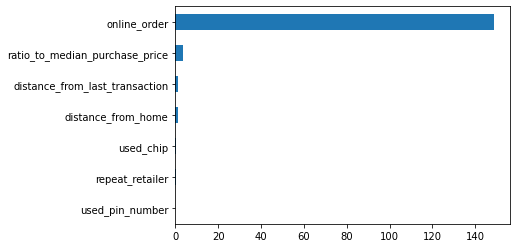

In [27]:
# Bar chart showing the coefficients of the models.
feat_imp.plot(kind="barh")

##### To be continued...